In [14]:
def getSignedInt(number, bitSize):
    msbMask = 1 << (bitSize - 1)
    msb = number >> (bitSize - 1)

    if msb:  # is negative due to msb being 1, do inverse 2's complement
        int_max = 2 ** bitSize - 1
        complement = int_max + 1 - number
        complement = complement * -1
        return complement
    else:
        return number

def decodeDataField(field):
    flippedData = flipDataBytes(field)
    return getSignedInt(flippedData, 16)


def flipDataBytes(dataBytes):
    firstByte = (dataBytes & 0xFF00) >> 8
    secondByte = (dataBytes & 0xFF) << 8
    return firstByte + secondByte
    
acc_x = []
acc_y = []
acc_z = []
yaw = []
pitch = []
roll = []
with open('./data/nic.txt') as f:
    for line in f:
        a, b = line.split(':')
        if a == 'error packet':
            continue
        b = int(b[2:], 16)
        acc_x.append(decodeDataField((b & 0xFFFF000000000000000000000000) >> 96))
        acc_y.append(decodeDataField((b & 0xFFFF00000000000000000000) >> 80))
        acc_z.append(decodeDataField((b & 0xFFFF0000000000000000) >> 64))
        yaw.append(decodeDataField((b & 0xFFFF000000000000) >> 48))
        pitch.append(decodeDataField((b & 0xFFFF00000000) >> 32))
        roll.append(decodeDataField((b & 0xFFFF0000) >> 16))

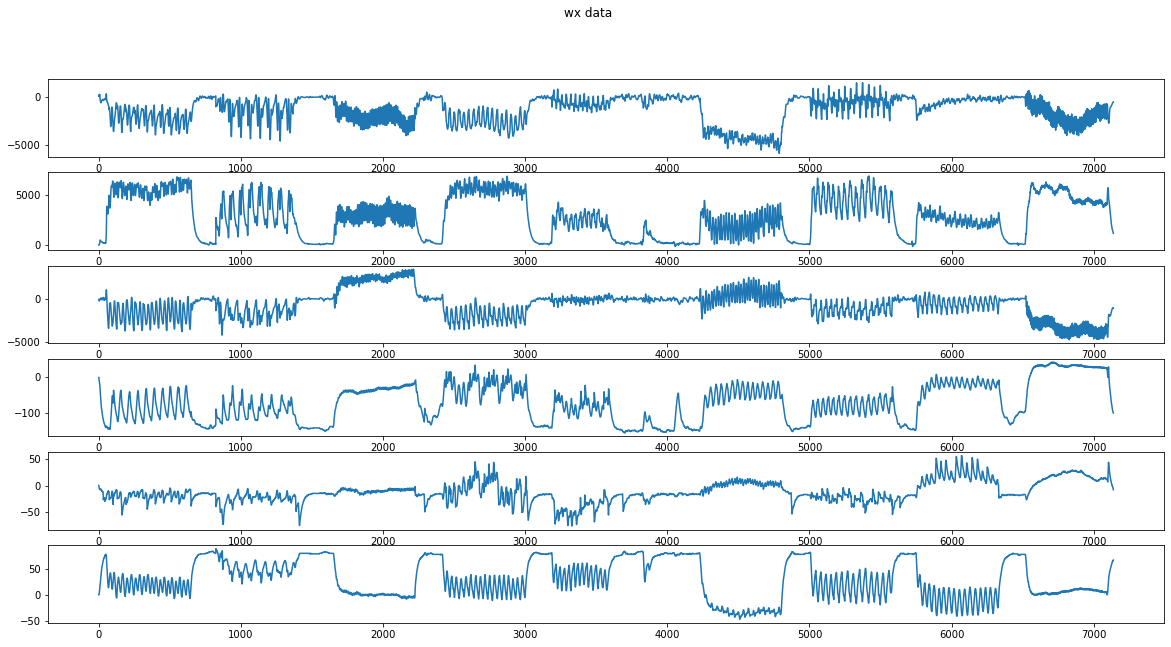

In [15]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(6,figsize=(20, 10))
fig.suptitle('wx data')

SLICE = slice(0,19000)

axs[0].plot(acc_x[SLICE])
axs[1].plot(acc_y[SLICE])
axs[2].plot(acc_z[SLICE])
axs[3].plot(yaw[SLICE])
axs[4].plot(pitch[SLICE])
axs[5].plot(roll[SLICE])
plt.show()

In [269]:
# Normalise data
def norm(a):
    return [(float(i)-min(a))/(max(a)-min(a)) for i in a]

acc_x = norm(acc_x)
acc_y = norm(acc_y)
acc_z = norm(acc_z)
yaw = norm(yaw)
pitch = norm(pitch)
roll = norm(roll)

In [270]:
#     xh           wx           nic        siying       jeff
# 200 - 600,   200 - 600,   150 - 600,   150 - 600,   500 - 1000 dab
# 850 - 1350,  900 - 1350,  900 - 1350,  1000 - 1400, 2250 - 2750 sidepump
# 1650 - 2100, 1700 - 1950, 1700 - 2200, 1625 - 2150, 4500 - 5000 wipe
# 2400 - 2850, 2200 - 2750, 2450 - 3000, 2400 - 2900, 7000 - 7500 hair
# 3200 - 3650, 3000 - 3500, 3225 - 3575, 3175 - 3650, 8500 - 9000 kick
# 3900 - 4400, 3750 - 4250, 4300 - 4750, 3950 - 4450, 11000 - 11500 point high
# 4650 - 5000, 4600 - 5350, 5050 - 5550, 4650 - 5200, 12500 - 13000 gun
# 5200 - 5700, 5650 - 6150, 5800 - 6300, 5400 - 6000, 15000 - 15500 listen 
# 6000 - 6450, 6600 - 6900, 6600 - 7000, 6200 - 6700, 17500 - 18000 roll

raw_data = []

def writeToFile(r, dance_move):
    for i in r:
        s = str(acc_x[i]) + " " + str(acc_y[i]) + " " + str(acc_z[i]) + " " + str(yaw[i]) + " " + str(pitch[i]) + " " + str(roll[i]) + " " + str(dance_move)
        raw_data.append(s)        

DAB, SIDEPUMP, WIPE, HAIR, KICK, POINT, GUN, LISTEN, ROLL = 0, 1, 2, 3, 4, 5, 6, 7, 8

a = range(500, 1000)
writeToFile(a, DAB)
a = range(2250, 2750)
writeToFile(a, SIDEPUMP)
a = range(4500, 5000)
writeToFile(a, WIPE)
a = range(7000, 7500)
writeToFile(a, HAIR)
a = range(8500, 9000)
writeToFile(a, KICK)
a = range(11000, 11500)
writeToFile(a, POINT)
a = range(12500, 13000)
writeToFile(a, GUN)
a = range(15000, 15500)
writeToFile(a, LISTEN)
a = range(17500, 18000)
writeToFile(a, ROLL)

print(len(raw_data))

4500


In [271]:
with open("test.txt", "a") as myfile:
    for x in raw_data:
        myfile.write(x + "\n")

In [1]:
raw_data = []
with open("test.txt") as myfile:
    for x in myfile:
        raw_data.append(x[:-1])
print(raw_data)

['0.8509475997192297 0.6318552201910459 0.296966552734375 0.015655517578125 0.06840717123493473 0.13211232311320756 0', '0.391308328501236 0.7959227271340068 0.906280517578125 0.046905517578125 0.06840717123493473 0.11324439858490566 0', '0.19464705343791008 0.8427991576891385 0.875030517578125 0.085968017578125 0.05986044803525523 0.08494251179245282 0', '0.17258217108676413 0.9521774956511124 0.789154052734375 0.125030517578125 0.04276700163589624 0.06607458726415094 0', '0.6725974303415021 0.3290810876796777 0.679840087890625 0.171905517578125 0.025673555236537242 0.04720666273584906 0', '0.7116611224707785 0.23535874507889035 0.83575439453125 0.234405517578125 3.338563749874804e-05 0.03777270047169811 0', '0.43681142612994783 0.45417645802179024 0.91387939453125 0.093780517578125 0.025640169599038493 0.03777270047169811 0', '0.31177709280678734 0.25104525894955293 0.867034912109375 0.031280517578125 0.03418689279871799 0.056640625 0', '0.8742637409588916 0.20413830988494522 0.22668

In [2]:
def create_data(window_size):
    res = []
    for i in range(0, len(raw_data)):
        if i + window_size >= len(raw_data):
            break
        else:
            flag = False
            *xyz, c = raw_data[i].split(' ')
            for j in range(1, window_size):
                *_, cn = raw_data[i + j].split(' ')
                if cn != c:
                    i = i + j - 1
                    flag = True
                    break
            if flag:
                continue
            #create window
            temp = []
            for x in xyz:
                temp.append(x)
            for j in range(1, window_size):
                *a, _ = raw_data[i + j].split(' ')
                assert _ == c
                for x in a:
                    temp.append(x)
            temp.append(c)
            res.append(temp)
    return res

data = create_data(50)
print(len(data)) 

19194


In [296]:
#Export data to csv

import csv

with open("input.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(data)
    

In [ ]:
import numpy as np
from keras.utils import to_categorical

arr = np.array(data)
arr = arr.transpose()
X = arr[0:arr.shape[0] - 1].transpose().astype('float32')
# one hot encoding
y = to_categorical(arr[-1])
print(y.shape)
print(X.shape)
print(y.dtype)
print(X.dtype)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)


In [287]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Neural network
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'],)

In [288]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 1.7410 - accuracy: 0.3738 - val_loss: 1.2311 - val_accuracy: 0.5296
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 1.1451 - accuracy: 0.5686 - val_loss: 0.9925 - val_accuracy: 0.6137
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 0.9015 - accuracy: 0.6628 - val_loss: 0.8498 - val_accuracy: 0.6710
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 0.7852 - accuracy: 0.7014 - val_loss: 0.7436 - val_accuracy: 0.7059
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.7326 - val_loss: 0.6882 - val_accuracy: 0.7390oss: 0.6981 - accuracy: 0.73
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.7576 - val_loss: 0.6266 - val_accuracy: 0.7494
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7784 - val_loss: 0

Epoch 57/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.9725 - val_loss: 0.0981 - val_accuracy: 0.9654
Epoch 58/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.0916 - val_accuracy: 0.9687
Epoch 59/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9693
Epoch 60/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9685
Epoch 61/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9708
Epoch 62/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0880 - val_accuracy: 0.9677
Epoch 63/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0832 - val_accuracy:

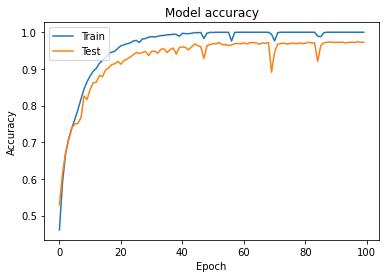

In [289]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

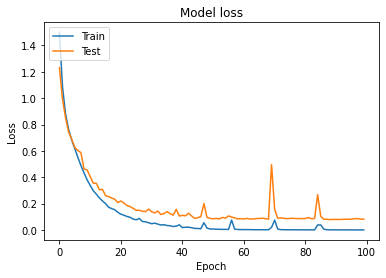

In [290]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [291]:
model.save('./jeff_model')

INFO:tensorflow:Assets written to: ./jeff_model\assets
